In [1]:
import numpy as np

In [2]:
from pydbm.nn.neural_network import NeuralNetwork
from pydbm.nn.nn_layer import NNLayer as NNLayer1

In [3]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [4]:
from pydbm.synapse.nn_graph import NNGraph as NNGraph1

In [5]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

In [6]:
from pydbm.optimization.batch_norm import BatchNorm

In [7]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(ERROR)
logger.setLevel(ERROR)
logger.addHandler(handler)

In [8]:
epochs = 300
batch_size = 20
dimension = 100
dimension2 = 500
scale = 0.01

In [9]:
activation_function = LogisticFunction()
activation_function.batch_norm = BatchNorm()

In [10]:
activation_function.batch_norm.beta_arr is None

True

In [11]:
activation_function.batch_norm.gamma_arr is None

True

In [12]:
nn_layer1 = NNLayer1(
    NNGraph1(
        activation_function=activation_function,
        hidden_neuron_count=dimension,
        output_neuron_count=dimension,
        scale=scale,
    )
)

opt_params = Adam()
opt_params.weight_limit = 0.5
opt_params.dropout_rate = 0.0

nn = NeuralNetwork(
    nn_layer_list=[
        nn_layer1, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-08,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=10.0),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)


Setup NN layers and the parameters.


In [13]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dimension))
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())

In [18]:
nn.learn(observed_arr=observed_arr, target_arr=observed_arr)

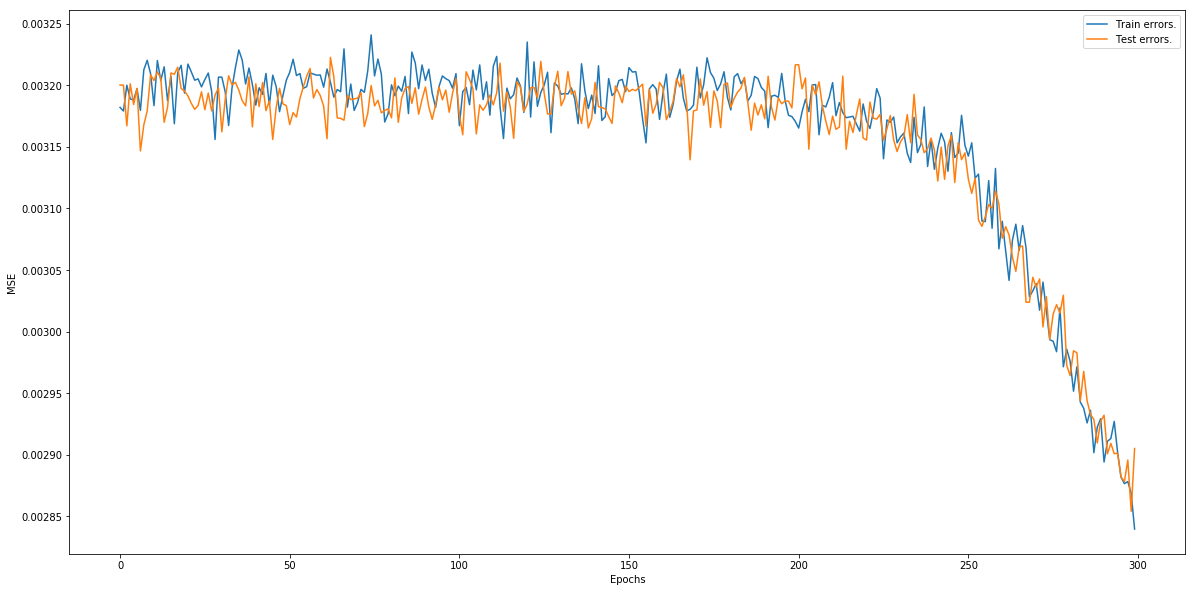

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(nn.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(nn.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()

In [16]:
activation_function.batch_norm.beta_arr

array([[[-3.95283530e-03, -4.34525344e-03,  5.71734706e-03, ...,
         -8.51150496e-04, -1.23479792e-05,  1.30130546e-03]],

       [[ 1.44878819e-02, -4.66075188e-02,  6.34183887e-03, ...,
         -3.84393507e-03,  7.27329309e-04, -1.49920321e-02]],

       [[-3.82336411e-03,  9.78316616e-03, -8.12643502e-03, ...,
         -1.18228144e-03,  4.59895471e-03, -2.93855034e-03]],

       ...,

       [[-3.22951801e-03,  5.03215976e-03,  1.18704445e-02, ...,
         -7.26106334e-03,  2.64515502e-04, -3.46897952e-02]],

       [[ 1.64560290e-02,  1.29798506e-02,  3.27511502e-03, ...,
          9.38117086e-03, -1.04401572e-02, -5.18600976e-03]],

       [[ 2.19138930e-02, -3.11636891e-02,  2.01714550e-02, ...,
         -7.31172508e-03,  2.23509740e-02,  2.14442385e-02]]])

In [17]:
activation_function.batch_norm.gamma_arr

array([[[0.96076462, 0.96689914, 0.96692079, ..., 0.96914053,
         0.96409256, 0.97034481]],

       [[0.95647306, 0.96514285, 0.96067369, ..., 0.9538175 ,
         0.9624983 , 0.95850509]],

       [[0.96184801, 0.95443571, 0.9659119 , ..., 0.96793028,
         0.96230673, 0.95821261]],

       ...,

       [[0.96519754, 0.96431223, 0.95781121, ..., 0.96013229,
         0.95887844, 0.97442725]],

       [[0.96091949, 0.96144024, 0.96193319, ..., 0.97211055,
         0.96509222, 0.96388606]],

       [[0.95976394, 0.96602445, 0.95897251, ..., 0.96437229,
         0.96517589, 0.96287369]]])